In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'SimHei'

raw = pd.read_excel(
    "失业率.xlsx",
    header=None
)

# =========================
# 2. 删除全空行（说明文字区域）
# =========================
raw = raw.dropna(how="all").reset_index(drop=True)

# =========================
# 3. 找到真正的数据起始行
#    （通常包含“年”或“Year”）
# =========================
start_row = raw[raw.iloc[:, 0].astype(str).str.contains("Year", na=False)].index[0]

df = raw.iloc[start_row:].reset_index(drop=True)

# =========================
# 4. 设置真正的列名（用第一行）
# =========================
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)

# =========================
# 5. 删除无意义列（Unnamed / NaN）
# =========================
df = df.loc[:, df.columns.notna()]
df = df.loc[:, ~df.columns.astype(str).str.contains("Unnamed")]

In [2]:
df = df.iloc[1:]
df.head()

,Year and month,15～24,25～34,35～44,45～54,55～64,15～24,25～34,35～44,45～54,55～64,15～24,25～34,35～44,45～54,55～64
1,昭和45年,2,1.1,0.7,0.6,1.2,2.1,1,0.7,0.6,1.4,1.9,1.4,0.8,…,…
2,1970,1.9,1,0.8,0.6,1.2,2.2,1,0.9,0.6,1.6,1.7,1.1,0.6,…,…
3,NaN,1.7,1.1,0.7,0.6,1.1,1.7,1,0.8,0.8,1.4,1.7,1,0.6,…,…
4,※注_Notes,2,1.3,0.8,0.8,1.2,1.9,1.2,0.7,1.1,1.7,1.9,1.4,0.8,…,…
5,NaN,1.6,1.2,0.7,0.8,1.4,1.6,1,0.7,0.9,1.8,1.5,1.5,0.7,…,…


In [3]:
for k in range(41):
    year = 1970+k
    df.iloc[k*12:k*12+12, 0] = year
df = df.rename(columns = {"Year and month ":"Year"})
data_total = df.iloc[:492, [0, 1, 2, 3, 4, 5]].copy()
data_man = df.iloc[:492, [0, 6, 7, 8, 9, 10]].copy()
data_woman = df.iloc[:492, [0, 11, 12, 13, 14, 15]].copy()

In [4]:
data_total_group = data_total.groupby("Year").agg({
    "15～24": "mean", 
    "25～34": "mean",  
    "35～44": "mean",
    "45～54": "mean",
    "55～64": "mean"
}).reset_index()

data_total_group = data_total_group.rename(columns={
    "15～24": "15-24",
    "25～34": "25-34", 
    "35～44": "35-44",
    "45～54": "45-54",
    "55～64": "55-64"
})

data_man_group = data_man.groupby("Year").agg({
    "15～24": "mean", 
    "25～34": "mean",  
    "35～44": "mean",
    "45～54": "mean",
    "55～64": "mean"
}).reset_index()

data_man_group = data_man_group.rename(columns={
    "15～24": "15-24",
    "25～34": "25-34", 
    "35～44": "35-44",
    "45～54": "45-54",
    "55～64": "55-64"
})

data_woman_group = data_woman.groupby("Year").agg({
    "15～24": "mean", 
    "25～34": "mean",  
    "35～44": "mean"
}).reset_index()

data_woman_group = data_woman_group.rename(columns={
    "15～24": "15-24",
    "25～34": "25-34", 
    "35～44": "35-44"
})

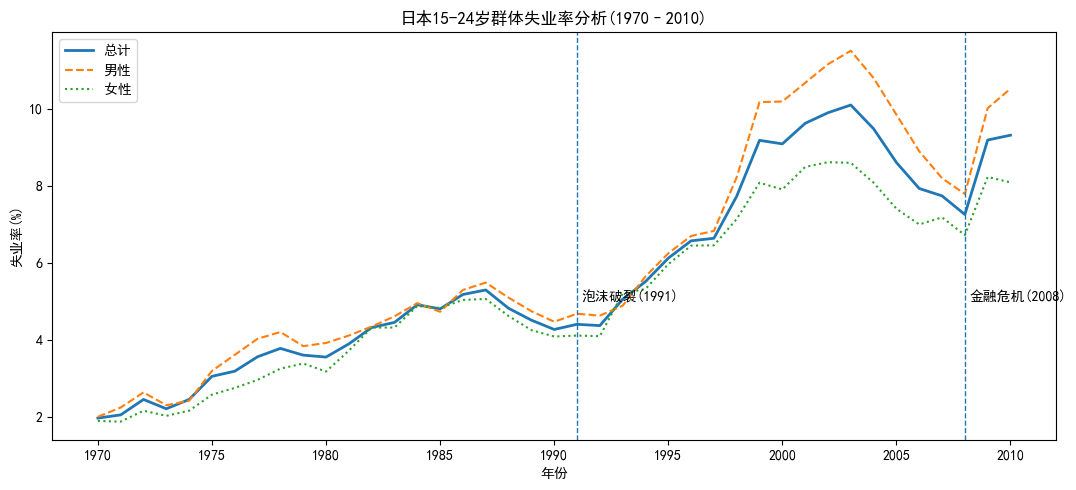

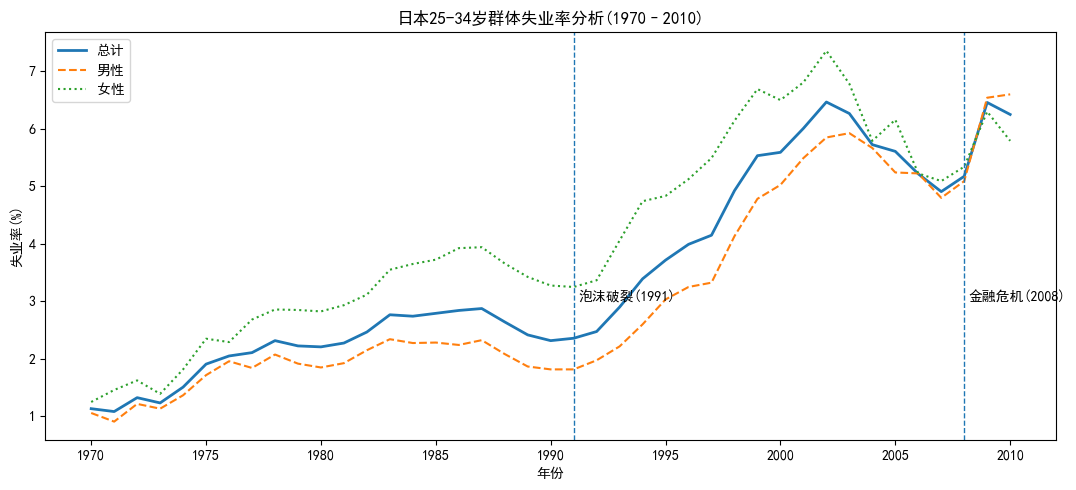

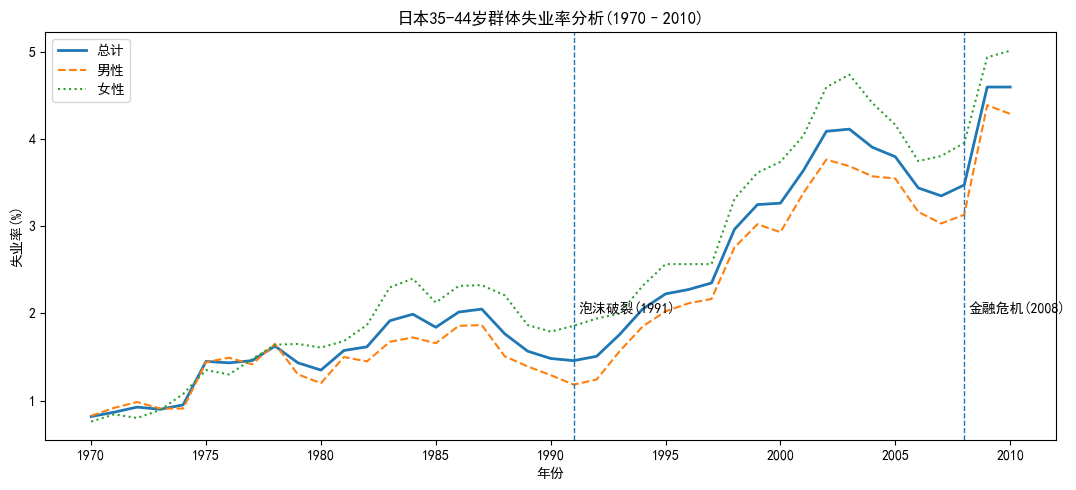

In [5]:
index_lst = ["15-24", "25-34", "35-44"]
for k in range(3):
    plt.figure(figsize=(11, 5))
    
    plt.plot(data_total_group["Year"], data_total_group[index_lst[k]], label="总计", linewidth=2)
    plt.plot(data_man_group["Year"], data_man_group[index_lst[k]], label="男性", linestyle="--")
    plt.plot(data_woman_group["Year"], data_woman_group[index_lst[k]], label="女性", linestyle=":")
    
    # 泡沫破裂标记
    plt.axvline(x=1991, linestyle="--", linewidth=1)
    plt.text(1991 + 0.2, data_total_group[index_lst[k]].max()//2, "泡沫破裂(1991)")
    
    plt.axvline(x=2008, linestyle="--", linewidth=1)
    plt.text(2008 + 0.2, data_total_group[index_lst[k]].max()//2, "金融危机(2008)")
    
    plt.title(f"日本{index_lst[k]}岁群体失业率分析(1970–2010)")
    plt.xlabel("年份")
    plt.ylabel("失业率(%)")
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f"1970-2010年{index_lst[k]}岁群体失业率.jpg")
    plt.show()


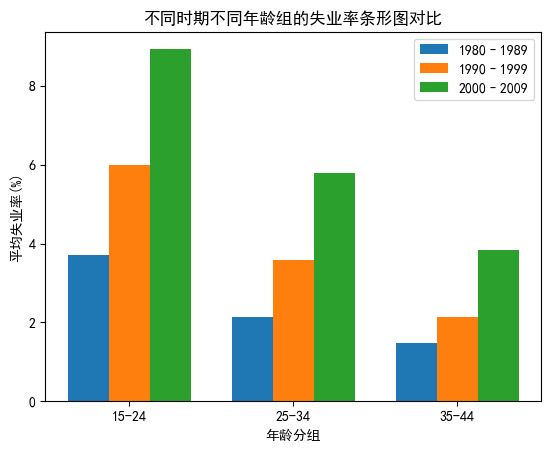

In [6]:
periods = {
    "1970–1989": data_total_group[(data_total_group["Year"] >= 1970) & (data_total_group["Year"] <= 1989)],
    "1990–1999": data_total_group[(data_total_group["Year"] >= 1990) & (data_total_group["Year"] <= 1999)],
    "2000–2010": data_total_group[(data_total_group["Year"] >= 2000) & (data_total_group["Year"] <= 2010)],
}

age_groups = ["15-24", "25-34", "35-44"]

avg_data = []
for p in periods.values():
    avg_data.append(p[age_groups].mean().values)

avg_data = np.array(avg_data)

x = np.arange(len(age_groups))
width = 0.25

plt.figure()
plt.bar(x - width, avg_data[0], width, label="1980–1989")
plt.bar(x, avg_data[1], width, label="1990–1999")
plt.bar(x + width, avg_data[2], width, label="2000–2009")

plt.xticks(x, age_groups)
plt.xlabel("年龄分组")
plt.ylabel("平均失业率(%)")
plt.title("不同时期不同年龄组的失业率条形图对比")
plt.legend()
plt.savefig("不同时期不同年龄组的失业率条形图对比.jpg")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_28772\3025381253.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_total_group_2[col] = pd.to_numeric(


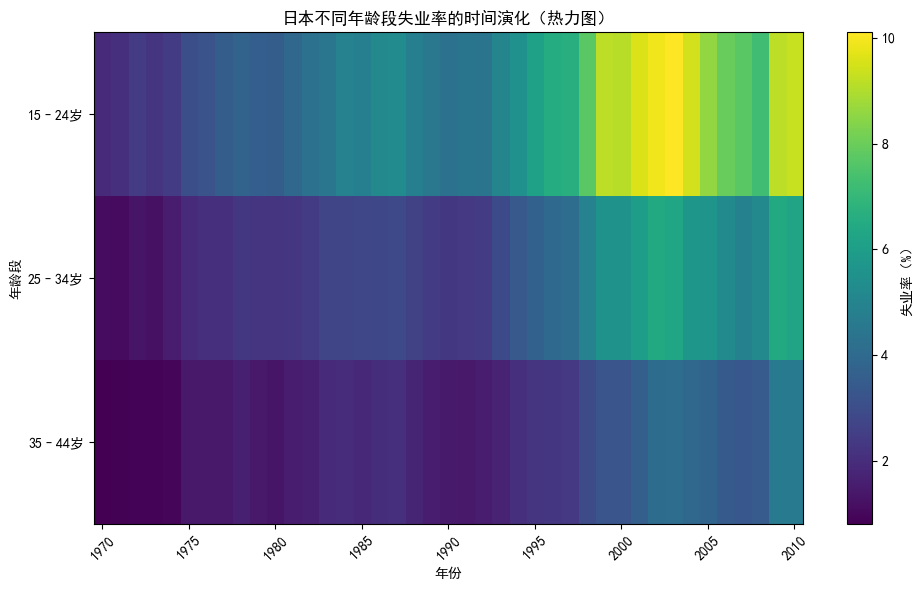

In [7]:

age_cols = ["15-24", "25-34", "35-44"]

data_total_group_2 = data_total_group[["Year"] + age_cols]

for col in age_cols:
    data_total_group_2[col] = pd.to_numeric(
        data_total_group_2[col],
        errors="coerce"
    )

data_total_group_2 = data_total_group_2.dropna()

heatmap_data = data_total_group_2.set_index("Year")

plt.figure(figsize=(10, 6))
plt.imshow(
    heatmap_data.T.values,
    aspect="auto",
    interpolation="nearest"
)

plt.colorbar(label="失业率（%）")

plt.yticks(
    ticks=np.arange(len(age_cols)),
    labels=["15–24岁", "25–34岁", "35–44岁"]
)

plt.xticks(
    ticks=np.arange(0, len(heatmap_data.index), 5),
    labels=heatmap_data.index[::5],
    rotation=45
)

plt.xlabel("年份")
plt.ylabel("年龄段")
plt.title("日本不同年龄段失业率的时间演化（热力图）")

plt.tight_layout()
plt.savefig("日本不同年龄段失业率的时间演化（热力图）.jpg")
plt.show()

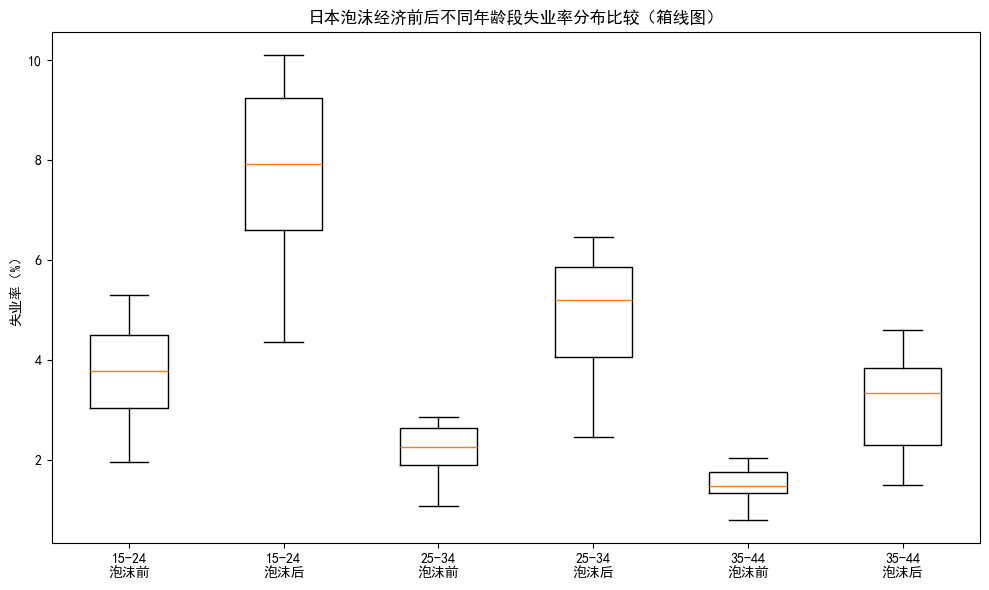

In [8]:
age_cols = ["15-24", "25-34", "35-44"]

# 2. 强制数值化（非常关键）
for col in age_cols:
    data_total_group[col] = pd.to_numeric(data_total_group[col], errors="coerce")

pre_bubble = data_total_group[(data_total_group["Year"] >= 1970) & (data_total_group["Year"] <= 1990)]
post_bubble = data_total_group[(data_total_group["Year"] >= 1992) & (data_total_group["Year"] <= 2010)]

box_data = []
labels = []

for col in age_cols:
    box_data.append(pre_bubble[col])
    labels.append(f"{col}\n泡沫前")

    box_data.append(post_bubble[col])
    labels.append(f"{col}\n泡沫后")

plt.figure(figsize=(10, 6))

plt.boxplot(
    box_data,
    labels=labels
)

plt.ylabel("失业率（%）")
plt.title("日本泡沫经济前后不同年龄段失业率分布比较（箱线图）")

plt.tight_layout()
plt.savefig("日本泡沫经济前后不同年龄段失业率分布比较（箱线图）.jpg")
plt.show()

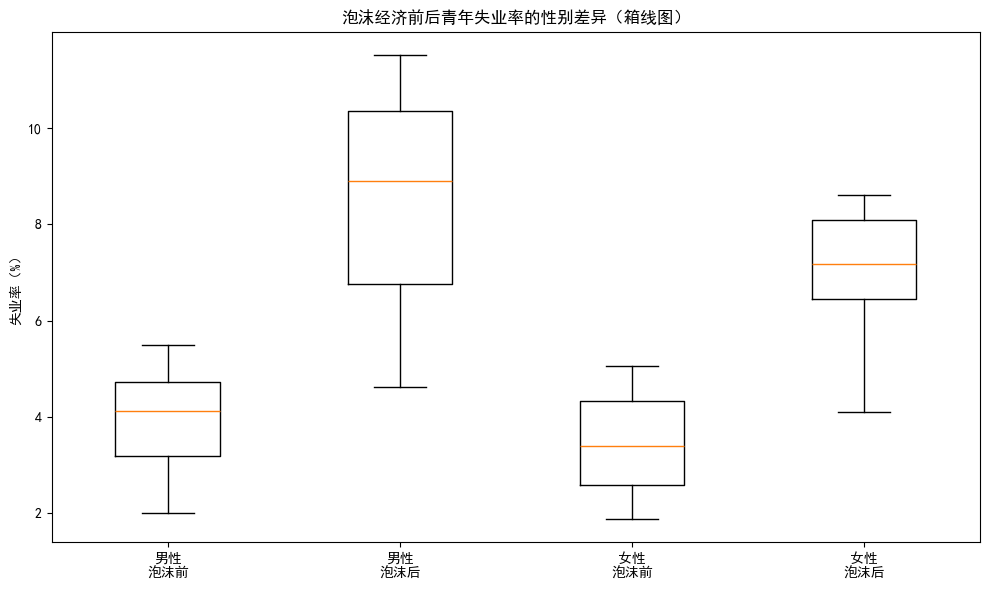

In [9]:
age_col = "15-24"

for df in [data_man_group, data_woman_group]:
    df[age_col] = pd.to_numeric(df[age_col], errors="coerce")

male_pre = data_man_group[(data_man_group["Year"] >= 1970) & (data_man_group["Year"] <= 1990)][age_col]
male_post = data_man_group[(data_man_group["Year"] >= 1992) & (data_man_group["Year"] <= 2010)][age_col]

female_pre = data_woman_group[(data_woman_group["Year"] >= 1970) & (data_woman_group["Year"] <= 1990)][age_col]
female_post = data_woman_group[(data_woman_group["Year"] >= 1992) & (data_woman_group["Year"] <= 2010)][age_col]

box_data = [
    male_pre,
    male_post,
    female_pre,
    female_post
]

labels = [
    "男性\n泡沫前",
    "男性\n泡沫后",
    "女性\n泡沫前",
    "女性\n泡沫后"
]

# 绘制箱线图
plt.figure(figsize=(10, 6))

plt.boxplot(
    box_data,
    labels=labels
)

plt.ylabel("失业率（%）")
plt.title("泡沫经济前后青年失业率的性别差异（箱线图）")

plt.tight_layout()
plt.savefig("泡沫经济前后青年失业率的性别差异（箱线图）.jpg")
plt.show()

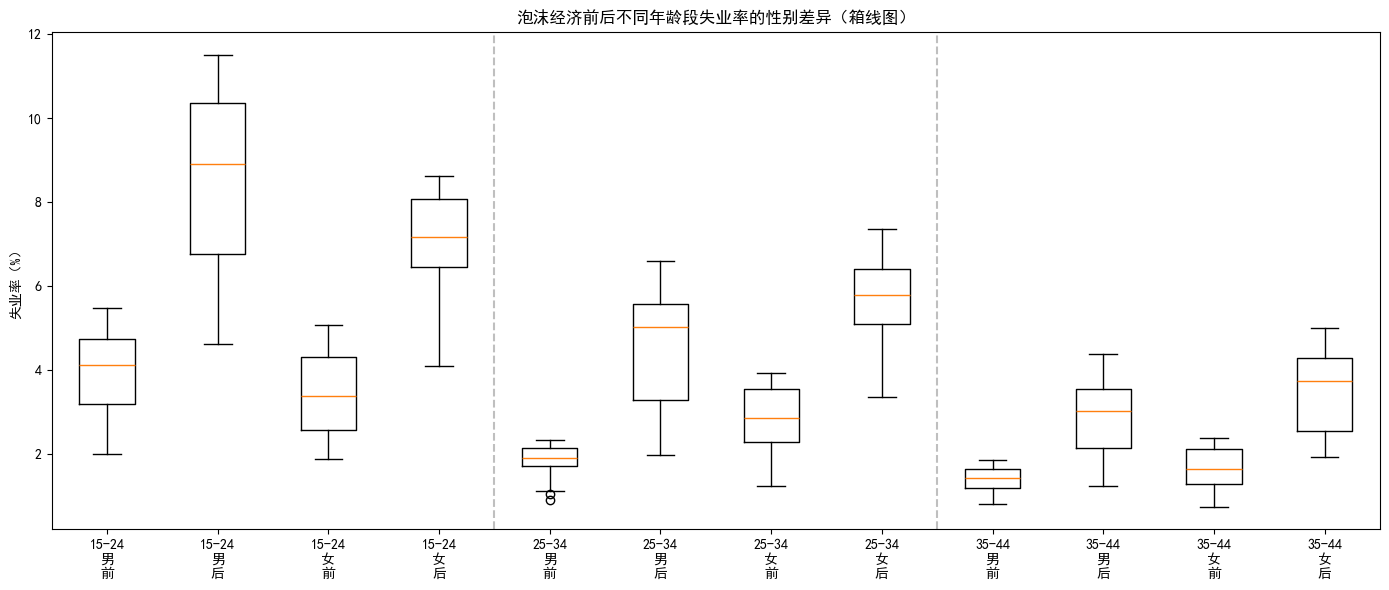

In [10]:
age_cols = ["15-24", "25-34", "35-44"]
for df in [data_man_group, data_woman_group]:
    df[age_col] = pd.to_numeric(df[age_col], errors="coerce")

# 划分泡沫前 / 后
male_pre = data_man_group[(data_man_group["Year"] >= 1970) & (data_man_group["Year"] <= 1990)]
male_post = data_man_group[(data_man_group["Year"] >= 1992) & (data_man_group["Year"] <= 2010)]
female_pre = data_woman_group[(data_woman_group["Year"] >= 1970) & (data_woman_group["Year"] <= 1990)]
female_post = data_woman_group[(data_woman_group["Year"] >= 1992) & (data_woman_group["Year"] <= 2010)]

box_data = []
labels = []

for age in age_cols:
    box_data.extend([
        male_pre[age],
        male_post[age],
        female_pre[age],
        female_post[age]
    ])

    labels.extend([
        f"{age}\n男\n前",
        f"{age}\n男\n后",
        f"{age}\n女\n前",
        f"{age}\n女\n后"
    ])

plt.figure(figsize=(14, 6))

plt.boxplot(
    box_data,
    labels=labels
)

plt.ylabel("失业率（%）")
plt.title("泡沫经济前后不同年龄段失业率的性别差异（箱线图）")

for i in [4.5, 8.5]:
    plt.axvline(i, color="gray", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.savefig("多时段男女失业率的性别差异（箱线图）.jpg")
plt.show()